In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp

In [5]:
df = pd.read_csv('experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


/Users/arkadijorehov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

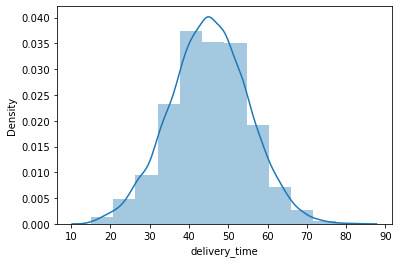

In [18]:
sns.distplot(df[df.experiment_group == 'control'].delivery_time, bins=12)

/Users/arkadijorehov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

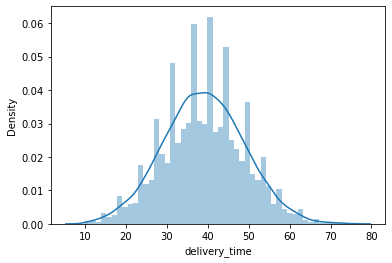

In [13]:
sns.distplot(df[df.experiment_group == 'test'].delivery_time)

In [20]:
df[df.experiment_group == 'test'].shape[0] - df[df.experiment_group == 'control'].shape[0]

12

In [21]:
df[df.experiment_group == 'test'].delivery_time.sample??

Object `delivery_time.sample` not found.


In [23]:
sample_test = df[df.experiment_group == 'test'].delivery_time.sample(1000, random_state=17)
sample_test

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
         ... 
12410    40.0
18882    47.0
15944    47.0
14618    41.0
18816    36.0
Name: delivery_time, Length: 1000, dtype: float64

In [25]:
sp.stats.shapiro(sample_test)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [26]:
sample_control = df[df.experiment_group == 'control'].delivery_time.sample(1000, random_state=17)
sample_control

7144    42.0
6231    42.0
6902    41.0
7032    54.0
2009    44.0
        ... 
752     54.0
3754    63.0
5420    64.0
8119    49.0
4804    45.0
Name: delivery_time, Length: 1000, dtype: float64

In [27]:
sp.stats.shapiro(sample_control)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [28]:
np.std(df[df.experiment_group == 'test'].delivery_time)

9.882819260031312

In [29]:
np.std(df[df.experiment_group == 'control'].delivery_time)

9.989522000653128

In [30]:
sp.stats.ttest_ind(df[df.experiment_group == 'test'].delivery_time,
                   df[df.experiment_group == 'control'].delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [34]:
df[df.experiment_group == 'test'].delivery_time.mean() * 100 / df[df.experiment_group == 'control'].delivery_time.mean() - 100

-13.354653121660817